## Feature Engineering and Selection  for Mobile Money and Financial Inclusion in Tanzania Dataset

### Understand The Problem Statement
A small percent of people in Tanzania have bank accounts and a lot more of Tanzanians who don’t have bank accounts do other types of formal financial services, primarily, mobile money.

Mobile money has become an important entry point to financial inclusion for people who have been traditionally excluded from the formal financial systems in Africa. It is increasingly becoming a platform for people to access a broad range of financial services.

This means mobile money clients and markets are increasing exponentially all over Tanzania and hence mobile money providers need a way to be able to thoroughly target the said increasing markets and clients for better effectiveness.

By predicting which individuals are most likely to use mobile money, a precise target area can also be attained.


### Type of the Problem
It is a classification problem where we have to predict which individuals are most likely to use mobile money.

The goal is to accurately classify each individual into four groups;

1.Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance.

2.Individuals who do not use mobile money but use at least one of the other financial services.

3.Individuals who use mobile money only

4.Individuals who use mobile money and at least one other financial service

### Load Python Packages

In [58]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

### Load Dataset

In [59]:
# Import data
data = pd.read_csv('training.csv')


In [60]:
# print shape 
print('train data shape :', data.shape)

train data shape : (7094, 37)


In [61]:
# Inspect Data by shing the first five rows 
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


### Explolatory Data Analysis (overview)

In [62]:
#show list of columns 
list(data.columns)  

['ID',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8_1',
 'Q8_2',
 'Q8_3',
 'Q8_4',
 'Q8_5',
 'Q8_6',
 'Q8_7',
 'Q8_8',
 'Q8_9',
 'Q8_10',
 'Q8_11',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Latitude',
 'Longitude',
 'mobile_money',
 'savings',
 'borrowing',
 'insurance',
 'mobile_money_classification']

In [63]:
## show Some information about the dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7094 non-null   int64  
 1   Q1                           7094 non-null   int64  
 2   Q2                           7094 non-null   int64  
 3   Q3                           7094 non-null   int64  
 4   Q4                           7094 non-null   int64  
 5   Q5                           7094 non-null   int64  
 6   Q6                           7094 non-null   int64  
 7   Q7                           7094 non-null   int64  
 8   Q8_1                         7094 non-null   int64  
 9   Q8_2                         7094 non-null   int64  
 10  Q8_3                         7094 non-null   int64  
 11  Q8_4                         7094 non-null   int64  
 12  Q8_5                         7094 non-null   int64  
 13  Q8_6              

In [64]:
# Check for missing values
print('missing values:', data.isnull().sum())

missing values: ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                        

### Feature Engineering

In [65]:
#remove id, Latitude and Longitude features 

data = data.drop('ID', axis=1)
data = data.drop('Latitude', axis=1)
data = data.drop('Longitude', axis=1)

#show shape

data.shape 

(7094, 34)

In [66]:
#split dataset into features and target
target = data['mobile_money_classification']
features = data.drop('mobile_money_classification', axis =1)

In [67]:
#show shape 

features.shape

(7094, 33)

In [68]:
#show first five rows

features.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q14,Q15,Q16,Q17,Q18,Q19,mobile_money,savings,borrowing,insurance
0,98,2,3,1,1,2,2,0,0,0,...,2,-1,1,-1,4,4,0,0,0,0
1,40,1,1,3,5,1,1,1,0,0,...,1,5,4,4,1,4,1,1,1,0
2,18,2,4,6,3,2,1,0,0,0,...,2,-1,1,-1,1,1,1,0,0,0
3,50,1,1,3,1,1,1,0,0,0,...,2,-1,4,-1,1,4,1,0,1,0
4,34,1,1,1,1,2,1,0,1,0,...,1,1,1,-1,1,4,1,1,0,1


In [69]:
# Replacing value 2 with 0 in binary features

features['Q2']=features['Q2'].replace(2,0)
features['Q6']=features['Q6'].replace(2,0)
features['Q7']=features['Q7'].replace(2,0)
features['Q12']=features['Q12'].replace(2,0)
features['Q14']=features['Q14'].replace(2,0)


In [70]:
#show first five rows

features.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q14,Q15,Q16,Q17,Q18,Q19,mobile_money,savings,borrowing,insurance
0,98,0,3,1,1,0,0,0,0,0,...,0,-1,1,-1,4,4,0,0,0,0
1,40,1,1,3,5,1,1,1,0,0,...,1,5,4,4,1,4,1,1,1,0
2,18,0,4,6,3,0,1,0,0,0,...,0,-1,1,-1,1,1,1,0,0,0
3,50,1,1,3,1,1,1,0,0,0,...,0,-1,4,-1,1,4,1,0,1,0
4,34,1,1,1,1,0,1,0,1,0,...,1,1,1,-1,1,4,1,1,0,1


In [71]:
from sklearn.preprocessing import OneHotEncoder


In [72]:
oneHot = OneHotEncoder(handle_unknown='ignore')

In [73]:
categorical_features = ['Q3', 'Q4','Q5','Q9','Q10','Q11','Q13','Q15','Q16','Q17','Q18','Q19']

In [74]:
oneHot.fit(features[categorical_features])

OneHotEncoder(handle_unknown='ignore')

In [75]:
# convert categorical features to numerical features


categorical_features = ['Q3', 'Q4','Q5','Q9','Q10','Q11','Q13','Q15','Q16','Q17','Q18','Q19']

# One Hot Encoding conversion
#features = pd.get_dummies(features, prefix_sep='_', columns = categorical_features)
features = pd.get_dummies(features, prefix_sep='_', columns = categorical_features)



In [76]:
import joblib
joblib.dump(oneHot, "one-hot-encoder.pkl")

['one-hot-encoder.pkl']

In [77]:
#show the shape of the data

features.shape

(7094, 103)

In [78]:
#show first five rows
features.head()

,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,...,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5
0,98,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,40,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,18,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,50,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,34,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [79]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [80]:
# feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1))


features['Q1'] = scaler.fit_transform(data['Q1'].values.reshape(-1,1))



In [81]:
import joblib
joblib.dump(scaler, "MinMaxScaler.pkl")

['MinMaxScaler.pkl']

In [82]:
#show the shape of the data

features.shape

(7094, 103)

In [83]:
# show data of the first row 
features[:1].values 


array([[0.97619048, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

### Feature Selections

#### Univariate Selections

In [84]:
# import packages 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [85]:
#apply SelectKBest class to extract top 40 best features
bestfeatures = SelectKBest(score_func=chi2, k=40)

#train to find best features
fit = bestfeatures.fit(features,target)

#save in the dataframe 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 

#print 40 best features 
print(featureScores.nlargest(40,'Score'))  

            Specs        Score
17   mobile_money  3164.000000
16            Q14  1721.635081
15            Q12  1601.120504
18        savings  1509.223128
19      borrowing  1384.612838
75         Q15_-1  1043.427012
86          Q16_5   871.570057
3              Q7   864.183832
68         Q13_-1   683.801817
96          Q18_4   630.112224
82          Q16_1   614.472750
78          Q15_3   541.673365
71          Q13_3   532.322373
20      insurance   492.075542
25           Q4_1   466.822371
85          Q16_4   449.920700
98          Q19_1   392.715965
72          Q13_4   345.818243
79          Q15_4   345.043261
91          Q17_4   333.652224
77          Q15_2   296.808108
4            Q8_1   260.513581
93          Q18_1   258.628053
80          Q15_5   257.242471
70          Q13_2   238.380502
84          Q16_3   228.398073
30           Q4_6   227.749859
74          Q13_6   214.832316
73          Q13_5   212.385823
101         Q19_4   203.818335
81          Q15_6   200.882610
31      

In [86]:
# fit and tranform into the 40 best features 
transformer = SelectKBest(chi2, k=83)

#transform from 110 features into top 40 features
top_40_features = transformer.fit_transform(features, target)

#show the shape 
top_40_features.shape 

(7094, 83)

### Model Creation

In [87]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

X_train, X_test, y_train, y_test = train_test_split(top_40_features,target,stratify=target,test_size = 0.25, random_state = 42)


#### RandomForestClassifier

In [88]:
group7 =RandomForestClassifier(n_estimators=150,n_jobs=-1)
group7.fit(X_train, y_train) 

y_pred = group7.predict(X_test) 


In [89]:
import joblib
joblib.dump(group7, "group7_model.pkl")

['group7_model.pkl']

#### Evaluation by using "Accuracy"

In [90]:
print('Accuracy: {:.2f}'.format(group7.score(X_test, y_test)))

Accuracy: 1.00


#### Evaluation by using "cross_val_score"

In [34]:
from sklearn.model_selection import cross_val_score

cross_val_score(group7, features, target, cv=5)

array([0.99788584, 0.99859056, 0.99365751, 1.        , 0.99858956])

#### Evaluation by using "F1_score"

In [35]:
print(f1_score(y_test,y_pred,average="macro"))


0.9984307151979566


#### Evaluation by using "accuracy_score"

In [36]:
print(accuracy_score(y_test,y_pred))

0.9988726042841037


#### Confusion Matrix

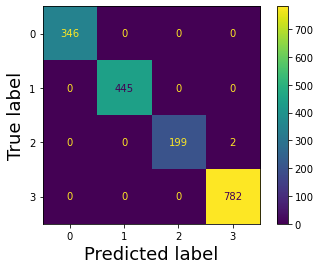

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(group7,X_test,y_test)
plt.show()


#### XGBoost

In [38]:
!pip install xgboost

In [39]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [40]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)

y_pred = XGB_model.predict(X_test)
print(f1_score(y_test,y_pred,average="micro"))


1.0


In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(XGB_model, features, target, cv=5)

array([1., 1., 1., 1., 1.])

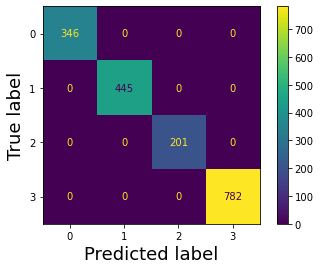

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(XGB_model,X_test,y_test)
plt.show()


#### LightGBM

In [43]:
!pip install lightgbm

In [44]:
from sklearn import metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       445
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       782

    accuracy                           1.00      1774
   macro avg       1.00      1.00      1.00      1774
weighted avg       1.00      1.00      1.00      1774



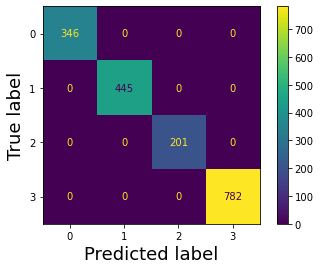

In [45]:
import lightgbm as ltb

LGBM_model = ltb.LGBMClassifier()
LGBM_model.fit(X_train,y_train)

expected_y = y_test
predicted_y = LGBM_model.predict(X_test)

print(metrics.classification_report(expected_y,predicted_y))

plot_confusion_matrix(LGBM_model,X_test,y_test)
plt.show()


#### CatBoost

In [46]:
!pip install catboost

Learning rate set to 0.086168
0:	learn: 1.1594896	total: 377ms	remaining: 6m 16s
1:	learn: 0.9913700	total: 384ms	remaining: 3m 11s
2:	learn: 0.8554931	total: 388ms	remaining: 2m 8s
3:	learn: 0.7480952	total: 394ms	remaining: 1m 38s
4:	learn: 0.6596057	total: 401ms	remaining: 1m 19s
5:	learn: 0.5845188	total: 406ms	remaining: 1m 7s
6:	learn: 0.5216927	total: 414ms	remaining: 58.8s
7:	learn: 0.4690910	total: 430ms	remaining: 53.4s
8:	learn: 0.4210265	total: 445ms	remaining: 49s
9:	learn: 0.3807412	total: 454ms	remaining: 44.9s
10:	learn: 0.3449274	total: 462ms	remaining: 41.6s
11:	learn: 0.3134513	total: 471ms	remaining: 38.7s
12:	learn: 0.2847160	total: 479ms	remaining: 36.4s
13:	learn: 0.2595555	total: 486ms	remaining: 34.3s
14:	learn: 0.2361195	total: 494ms	remaining: 32.4s
15:	learn: 0.2158223	total: 502ms	remaining: 30.9s
16:	learn: 0.1973738	total: 511ms	remaining: 29.5s
17:	learn: 0.1812011	total: 519ms	remaining: 28.3s
18:	learn: 0.1658865	total: 527ms	remaining: 27.2s
19:	learn

167:	learn: 0.0015781	total: 3.62s	remaining: 17.9s
168:	learn: 0.0015663	total: 3.63s	remaining: 17.9s
169:	learn: 0.0015548	total: 3.65s	remaining: 17.8s
170:	learn: 0.0015440	total: 3.65s	remaining: 17.7s
171:	learn: 0.0015306	total: 3.67s	remaining: 17.7s
172:	learn: 0.0015201	total: 3.7s	remaining: 17.7s
173:	learn: 0.0015101	total: 3.72s	remaining: 17.7s
174:	learn: 0.0014979	total: 3.75s	remaining: 17.7s
175:	learn: 0.0014878	total: 3.78s	remaining: 17.7s
176:	learn: 0.0014779	total: 3.79s	remaining: 17.6s
177:	learn: 0.0014682	total: 3.81s	remaining: 17.6s
178:	learn: 0.0014580	total: 3.83s	remaining: 17.6s
179:	learn: 0.0014481	total: 3.87s	remaining: 17.6s
180:	learn: 0.0014389	total: 3.89s	remaining: 17.6s
181:	learn: 0.0014299	total: 3.91s	remaining: 17.6s
182:	learn: 0.0014208	total: 3.93s	remaining: 17.6s
183:	learn: 0.0014118	total: 3.96s	remaining: 17.6s
184:	learn: 0.0014029	total: 3.99s	remaining: 17.6s
185:	learn: 0.0013942	total: 4.01s	remaining: 17.6s
186:	learn: 0

326:	learn: 0.0007493	total: 7.29s	remaining: 15s
327:	learn: 0.0007469	total: 7.3s	remaining: 15s
328:	learn: 0.0007445	total: 7.33s	remaining: 15s
329:	learn: 0.0007421	total: 7.34s	remaining: 14.9s
330:	learn: 0.0007397	total: 7.35s	remaining: 14.8s
331:	learn: 0.0007374	total: 7.36s	remaining: 14.8s
332:	learn: 0.0007351	total: 7.37s	remaining: 14.8s
333:	learn: 0.0007327	total: 7.38s	remaining: 14.7s
334:	learn: 0.0007304	total: 7.38s	remaining: 14.7s
335:	learn: 0.0007282	total: 7.39s	remaining: 14.6s
336:	learn: 0.0007259	total: 7.42s	remaining: 14.6s
337:	learn: 0.0007236	total: 7.44s	remaining: 14.6s
338:	learn: 0.0007214	total: 7.46s	remaining: 14.5s
339:	learn: 0.0007192	total: 7.47s	remaining: 14.5s
340:	learn: 0.0007169	total: 7.48s	remaining: 14.5s
341:	learn: 0.0007147	total: 7.53s	remaining: 14.5s
342:	learn: 0.0007126	total: 7.56s	remaining: 14.5s
343:	learn: 0.0007104	total: 7.58s	remaining: 14.4s
344:	learn: 0.0007082	total: 7.61s	remaining: 14.4s
345:	learn: 0.00070

495:	learn: 0.0004868	total: 10.3s	remaining: 10.5s
496:	learn: 0.0004858	total: 10.4s	remaining: 10.5s
497:	learn: 0.0004848	total: 10.4s	remaining: 10.5s
498:	learn: 0.0004838	total: 10.4s	remaining: 10.5s
499:	learn: 0.0004828	total: 10.5s	remaining: 10.5s
500:	learn: 0.0004818	total: 10.5s	remaining: 10.4s
501:	learn: 0.0004808	total: 10.5s	remaining: 10.4s
502:	learn: 0.0004798	total: 10.5s	remaining: 10.4s
503:	learn: 0.0004789	total: 10.6s	remaining: 10.4s
504:	learn: 0.0004779	total: 10.6s	remaining: 10.4s
505:	learn: 0.0004769	total: 10.6s	remaining: 10.3s
506:	learn: 0.0004760	total: 10.6s	remaining: 10.3s
507:	learn: 0.0004750	total: 10.6s	remaining: 10.3s
508:	learn: 0.0004741	total: 10.6s	remaining: 10.2s
509:	learn: 0.0004731	total: 10.6s	remaining: 10.2s
510:	learn: 0.0004722	total: 10.7s	remaining: 10.2s
511:	learn: 0.0004712	total: 10.7s	remaining: 10.2s
512:	learn: 0.0004703	total: 10.7s	remaining: 10.1s
513:	learn: 0.0004693	total: 10.7s	remaining: 10.1s
514:	learn: 

657:	learn: 0.0003652	total: 14.1s	remaining: 7.32s
658:	learn: 0.0003647	total: 14.1s	remaining: 7.31s
659:	learn: 0.0003641	total: 14.1s	remaining: 7.29s
660:	learn: 0.0003636	total: 14.2s	remaining: 7.26s
661:	learn: 0.0003630	total: 14.2s	remaining: 7.24s
662:	learn: 0.0003624	total: 14.2s	remaining: 7.21s
663:	learn: 0.0003619	total: 14.2s	remaining: 7.18s
664:	learn: 0.0003613	total: 14.2s	remaining: 7.16s
665:	learn: 0.0003608	total: 14.2s	remaining: 7.13s
666:	learn: 0.0003602	total: 14.2s	remaining: 7.1s
667:	learn: 0.0003597	total: 14.2s	remaining: 7.08s
668:	learn: 0.0003592	total: 14.3s	remaining: 7.05s
669:	learn: 0.0003586	total: 14.3s	remaining: 7.02s
670:	learn: 0.0003581	total: 14.3s	remaining: 7s
671:	learn: 0.0003575	total: 14.3s	remaining: 6.97s
672:	learn: 0.0003570	total: 14.3s	remaining: 6.94s
673:	learn: 0.0003565	total: 14.3s	remaining: 6.93s
674:	learn: 0.0003559	total: 14.3s	remaining: 6.9s
675:	learn: 0.0003554	total: 14.3s	remaining: 6.87s
676:	learn: 0.000

819:	learn: 0.0002925	total: 16s	remaining: 3.52s
820:	learn: 0.0002922	total: 16.1s	remaining: 3.5s
821:	learn: 0.0002918	total: 16.1s	remaining: 3.48s
822:	learn: 0.0002915	total: 16.1s	remaining: 3.46s
823:	learn: 0.0002911	total: 16.1s	remaining: 3.45s
824:	learn: 0.0002908	total: 16.2s	remaining: 3.43s
825:	learn: 0.0002904	total: 16.2s	remaining: 3.41s
826:	learn: 0.0002900	total: 16.2s	remaining: 3.39s
827:	learn: 0.0002897	total: 16.2s	remaining: 3.37s
828:	learn: 0.0002893	total: 16.2s	remaining: 3.35s
829:	learn: 0.0002890	total: 16.2s	remaining: 3.33s
830:	learn: 0.0002886	total: 16.3s	remaining: 3.31s
831:	learn: 0.0002883	total: 16.3s	remaining: 3.29s
832:	learn: 0.0002879	total: 16.3s	remaining: 3.26s
833:	learn: 0.0002876	total: 16.3s	remaining: 3.24s
834:	learn: 0.0002873	total: 16.3s	remaining: 3.23s
835:	learn: 0.0002869	total: 16.4s	remaining: 3.21s
836:	learn: 0.0002866	total: 16.4s	remaining: 3.19s
837:	learn: 0.0002862	total: 16.4s	remaining: 3.17s
838:	learn: 0.0

980:	learn: 0.0002443	total: 19.5s	remaining: 378ms
981:	learn: 0.0002441	total: 19.5s	remaining: 358ms
982:	learn: 0.0002438	total: 19.5s	remaining: 338ms
983:	learn: 0.0002436	total: 19.5s	remaining: 318ms
984:	learn: 0.0002433	total: 19.6s	remaining: 298ms
985:	learn: 0.0002431	total: 19.6s	remaining: 278ms
986:	learn: 0.0002428	total: 19.6s	remaining: 258ms
987:	learn: 0.0002426	total: 19.6s	remaining: 238ms
988:	learn: 0.0002424	total: 19.6s	remaining: 218ms
989:	learn: 0.0002421	total: 19.6s	remaining: 198ms
990:	learn: 0.0002419	total: 19.7s	remaining: 179ms
991:	learn: 0.0002416	total: 19.7s	remaining: 159ms
992:	learn: 0.0002414	total: 19.7s	remaining: 139ms
993:	learn: 0.0002411	total: 19.8s	remaining: 119ms
994:	learn: 0.0002409	total: 19.8s	remaining: 99.4ms
995:	learn: 0.0002406	total: 19.8s	remaining: 79.5ms
996:	learn: 0.0002404	total: 19.8s	remaining: 59.6ms
997:	learn: 0.0002402	total: 19.8s	remaining: 39.7ms
998:	learn: 0.0002399	total: 19.9s	remaining: 19.9ms
999:	le

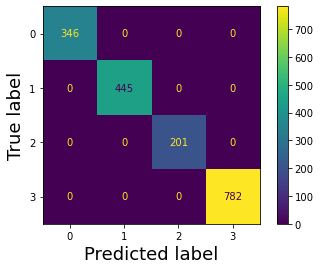

In [47]:
import catboost as ctb

CBC_model=ctb.CatBoostClassifier()
CBC_model.fit(X_train,y_train)

expected_y = y_test
predicted_y = CBC_model.predict(X_test)

print(metrics.classification_report(expected_y,predicted_y))

plot_confusion_matrix(CBC_model,X_test,y_test)
plt.show()


#### Voting Classifier

What is voting classifier?

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) 

based on their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed 

into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating

separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and

predicts output based on their combined majority of voting for each output class.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
              ]

In [50]:
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    print(name, accuracy_score(y_test, predictions))

Neural Network : 1.0
LogisticRegression : 1.0
ExtraTreesClassifier : 0.9994363021420518
DecisionTree : 1.0
RandomForest : 0.9988726042841037
Naive Bayes : 0.9904171364148816
KNeighbours : 0.842728297632469
SVM : 1.0
AdaBoostClassifier : 0.6916572717023676
GradientBoostingClassifier:  1.0


As we can see that LogisticRegression,ExtraTreesClassifier, DecisionTree, Naive Bayes and RandomForest are showing the higher

accuracy score than the rest, we can use these models in voting classifier.

In [51]:
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = LogisticRegression(max_iter = 1000)
clf3 = RandomForestClassifier()
clf4 = DecisionTreeClassifier()
clf5 = GaussianNB()

In [52]:
from sklearn.model_selection import cross_val_score
c = []
c.append(cross_val_score(clf1,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf2,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf3,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf4,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf5,X_train,y_train,scoring='accuracy',cv=10).mean())
print(c)

[0.9975563909774436, 1.0, 0.9973684210526317, 1.0, 0.9879699248120302]


#### Histogram-based Gradient boosting Classification Tree

In [53]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(loss = 'categorical_crossentropy',learning_rate=0.1, max_iter=1000)
clf.fit(X_train,y_train)


HistGradientBoostingClassifier(loss='categorical_crossentropy', max_iter=1000)

In [54]:
 clf.score(X_train,y_train)

1.0